In [1]:
a=1

In [2]:
print(a)

1


In [1]:
import u3

In [2]:
help (u3)

Help on module u3:

NAME
    u3

FILE
    c:\users\yiche\anaconda2\lib\site-packages\u3.py

DESCRIPTION
    Name: u3.py
    Desc: Defines the U3 class, which makes working with a U3 much easier. All of
          the low-level functions for the U3 are implemented as functions of the U3
          class. There are also a handful additional functions which improve upon
          the interface provided by the low-level functions.
    
    To learn about the low-level functions, please see Section 5.2 of the U3 User's Guide:
    
    http://labjack.com/support/u3/users-guide/5.2 
    
    Section Number Mapping:
    1 = Object Functions
    2 = User's Guide Functions
    3 = Convenience Functions
    4 = Private Helper Functions

CLASSES
    LabJackPython.Device(__builtin__.object)
        U3
    __builtin__.object
        FeedbackCommand
            AIN
            BitDirRead
            BitDirWrite
            BitStateRead
            BitStateWrite
            Counter
                Count

In [3]:
help(getAIN)

NameError: name 'getAIN' is not defined

In [5]:
help(u3.U3.getAIN)

Help on method getAIN in module u3:

getAIN(self, posChannel, negChannel=31, longSettle=False, quickSample=False) unbound u3.U3 method
    Name: U3.getAIN(posChannel, negChannel = 31, longSettle=False,
                                                 quickSample=False)
    
    Args: posChannel, the positive channel to read from.
          negChannel, the negitive channel to read from.
          longSettle, set to True for longSettle
          quickSample, set to True for quickSample
    
    Desc: A convenience function to read an AIN.
    
    Example:
    >>> import u3
    >>> d = u3.U3()
    >>> print d.getAIN( 0 )
    0.0501680038869



In [6]:
help(u3.U3.configIO)

Help on method configIO in module u3:

configIO(self, TimerCounterPinOffset=None, EnableCounter1=None, EnableCounter0=None, NumberOfTimersEnabled=None, FIOAnalog=None, EIOAnalog=None, EnableUART=None) unbound u3.U3 method
    Name: U3.configIO(TimerCounterPinOffset = 4, EnableCounter1 = None, EnableCounter0 = None, NumberOfTimersEnabled = None, FIOAnalog = None, EIOAnalog = None, EnableUART = None)
    
    Args: See section 5.2.3 of the user's guide.
    
    Desc: The configIO command.
    
    Examples:
    Simplest:
    >>> import u3
    >>> d = u3.U3()
    >>> print d.configIO()
    {
     'NumberOfTimersEnabled': 0,
     'TimerCounterPinOffset': 4,
     'DAC1Enable': 0,
     'FIOAnalog': 239,
     'EIOAnalog': 0,
     'TimerCounterConfig': 64,
     'EnableCounter1': False,
     'EnableCounter0': False
    }
    
    Set all FIOs and EIOs to digital (until power cycle):
    >>> import u3
    >>> d = u3.U3()
    >>> print d.configIO(FIOAnalog = 0, EIOAnalog = 0)
    {
     'NumberO

In [7]:
help(u3.U3.writeRegister)

Help on method writeRegister in module LabJackPython:

writeRegister(self, addr, value, unitId=None) unbound u3.U3 method
    Writes a value to a register. Returns the value to be written, if successful.
    Requires Modbus.py
    
    writeRegister(self, addr, value)
    addr: The address you want to write to.
    value: The value, or list of values, you want to write.
    
    if you cannot write to that register, a LabJackException is raised.
    Modbus is not supported for UE9's over USB. If you try it, a LabJackException is raised.



In [38]:
import u3
d = u3.U3()
d.configIO(FIOAnalog = 11110)
d.writeRegister(5002, 0.3)
d.getAIN(5)

0.305592048

In [36]:
a=d.exportConfig()

In [33]:
a

<ConfigParser.SafeConfigParser instance at 0x00000000086B7A88>

In [ ]:
import u3
import datetime
import sys

d = u3.U3
d.configIO(FIOAnalog = 1)
time = [0, 10, 20, 25]
output = [0, 1.0, 1.0, 0.5] 

if len(time) != len(output):
    sys.exit()

timedelta = [0] * (len(time) -1)
outputdelta = [0] * (len(time) -1)

for i in range(len(time) - 1):
    timedelta[i] = time[i+1] - time[i]
    outputdelta[i] = output[i+1] - output[i]

start_time = datetime.datetime.now()

while (datetime.datetime.now() - start_time).total_seconds() < timedelta[0]:
    d.writeRegister(5000, output[0] + outputdelta[0]*(datetime.datetime.now-a).total_seconds()/timedelta[0])


In [42]:
import sys
if 1 !=  1:
    sys.exit()
    
print('45')

45


In [4]:
import datetime
import time
import u3
t = [0, 10, 20, 30, 40]
voltage = [0, 0.5, 0.5, 1.1, 1.1]
data_t = []
data_v = []

start_time = datetime.datetime.now()
d = u3.U3()
d.configIO(FIOAnalog = 1) 
index = 1
this_voltage = 0
this_time = start_time
while index < len(t):
    time_in_date = datetime.datetime.now() - start_time
    time_in_seconds = time_in_date.total_seconds()
    time_passed = (datetime.datetime.now() - this_time).total_seconds()
    this_time = datetime.datetime.now()
    this_voltage = (voltage[index] - d.getAIN(0))/(t[index] - time_in_seconds) * time_passed + this_voltage
    data_t = data_t + [time_in_seconds]
    data_v = data_v + [d.getAIN(0)]
    
    d.writeRegister(5000, this_voltage)  
    if index < (len(t)) and time_in_seconds > t[index]:
        index = index + 1
    time.sleep(0.01)

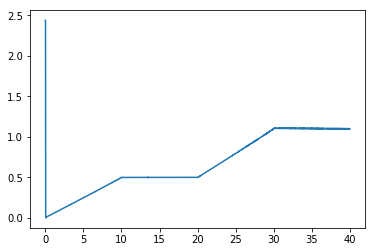

In [5]:
import matplotlib.pyplot as plt
plt.plot(data_t, data_v)
plt.show()

In [69]:
data_v

[0.30023481599999996,
 0.18943387199999998,
 0.05361336,
 0.010722671999999999,
 0.009531264,
 0.016679712,
 0.021445343999999998,
 0.022636752,
 0.023828159999999998,
 0.026210975999999997,
 0.027402384,
 0.028593792,
 0.032168016,
 0.033359424,
 0.034550832,
 0.036933648,
 0.038125056,
 0.040507872,
 0.04169928,
 0.042890687999999996,
 0.045273504,
 0.047656319999999995,
 0.048847728,
 0.051230543999999996,
 0.052421951999999994,
 0.05361336,
 0.055996175999999995,
 0.057187584,
 0.059570399999999996,
 0.060761807999999994,
 0.063144624,
 0.064336032,
 0.066718848,
 0.067910256,
 0.070293072,
 0.072675888,
 0.072675888,
 0.07505870399999999,
 0.07744152,
 0.07863292799999999,
 0.081015744,
 0.08220715199999999,
 0.08339856,
 0.08578137599999999,
 0.08816419199999999,
 0.0893556,
 0.09173841599999999,
 0.094121232,
 0.096504048,
 0.097695456,
 0.09888686399999999,
 0.10126967999999999,
 0.10246108799999999,
 0.10484390399999999,
 0.10722672,
 0.109609536,
 0.110800944,
 0.11318376,
 0

In [2]:
a = [1,2,3]*3
a[-1]

3

In [8]:
a = input("What is th anneal temperature?")
b = input('What is the anneal time?')
a+43

What is th anneal temperature?4.6
What is the anneal time?32


47.6

In [7]:
a+23

26.53

In [5]:
b

360

In [18]:
x = input("Enter a number: ")
y = input("Enter a second number: ")
print 'The sum of ', x, ' and ', y, ' is ', x+y, '.'

Enter a number: 3
Enter a second number: 45
The sum of  3  and  45  is  48 .


In [13]:
print('esfds')

esfds


In [17]:
x = 4
print "X =", x

X = 4


In [5]:
import u3
import time
d= u3.U3()
d.writeRegister(5000,0.0)

0.0

In [1]:
import u3

In [5]:
a = [212,434,54]
b=a/4
b

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [1]:
t1=10
t2=3
t3=3
t4=5
t5=2
t6=10
t_anneal=12
t7=2
cycle=1
V1=1
V2=2
V_anneal=0.5

t = [0, t1]      
voltage = [0.25]
T_period = t2 + t3 + t4 + t5
for i in range(cycle): 
    t = t + [ T_period * i+t1+t2, T_period * i+t1+t2+t3, T_period * i+t1+t2+t3+t4, T_period * i+t1+T_period]
    voltage = voltage + [V1, V1, V2, V2]* cycle + [V1, V_anneal, V_anneal, 0]
    
t = t + [t[-1]+ t6, t[-1]+ t6 + t_anneal , t[-1]+ t6 + t_anneal + t7]
print(t)
print(voltage)

[0, 10, 13, 16, 21, 23, 33, 45, 47]
[0.25, 1, 1, 2, 2, 1, 0.5, 0.5, 0]
